<a href="https://colab.research.google.com/github/OleksiiLatypov/Regression_of_Used_Car_Prices/blob/main/Regression_used_car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s4e9:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F76728%2F9057646%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240921%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240921T195706Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D93b25bd6ef6420a79b6540ee1a393248463be21e05027cb8ae5cb189afb58e70c7753f117846be6d16bb557d5aace249239e2104e3cb9db7fed328d08bd4d85b4dff21ffa98e968815b1decaa9782603064d61b8ed48bbf3255750f3879685cda2c0ec3e379cd7960c8510877fa098a2b7e14e11b291463e5d29359a1fbb908ac623b9a92aa11a51a3d11cda5d373c4c6b8615112265cafb6337b56169e1bb46a206c101d657f7cced6f560a089f9dd2ce034841089d417dea7735b18e71685794dc27d4705e8622772335c0cd05cb13b2710f5da1e299324d82596e43b1cd9600c18a128a41a0feeeaa0ad2392371a88dff9340d3c788aa4c980ce78f0fe455,used-cars:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5729009%2F9430129%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240921%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240921T195706Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8757d44d70178b0148d8fc54bad09eb7a1741f1a827a224b0f4ccb5c3a7c0852193e015ad2ebe1e963b5f7b2defaa4ba090a7f02d2e24c2f5fd00c68a7833cc6972031e948e37b4d3b1e952e05332dad27a17ec2819c652d8ff1025e57b56d1aeacdda3ccd17e1de73eb58f1f2966dd2c2c3f1ba73fc3cb761d65ab91785311ab3c57289820f87043e8247ba4c7286c9e95166494ca071b0b589e7229c207e7ec5837dd0133dc70479b8c025e1ab269d3a99864cea49cef859d2af470aaaa239b05a452eee999d13f73a8fc7b82a0f354699815263f01f0bb40eb6c4bf468b0b27e125c66816a290d3ae5cbeefbf139185851d5aa9e9ec49bebab4587b074fd7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import matplotlib.pyplot as plt
import re
from scipy import stats
from scipy.special import inv_boxcox
from datetime import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, LinearRegression
import category_encoders as ce

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-cars/used_cars.csv
/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv


In [ ]:
train = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')
original = pd.read_csv('/kaggle/input/used-cars/used_cars.csv')

**Drop id column**

In [ ]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

In [ ]:
train.shape

(188533, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [ ]:
test.shape

(125690, 11)

In [ ]:
original.shape

(4009, 12)

In [ ]:
train.describe()

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


In [ ]:
train.describe(include='object')

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
count,188533,188533,183450,188533,188533,188533,188533,186081,167114
unique,57,1897,7,1117,52,319,156,2,1
top,Ford,F-150 XLT,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
freq,23088,2945,165940,3462,49904,48658,107674,144514,167114


In [ ]:
original.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"


**Extract numerical values from milage and price column**

In [ ]:
original[['milage', 'price']] = original[['milage', 'price']].map(
    lambda x: int(''.join(re.findall(r'\d+', x))))

In [ ]:
original.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598


**Get limit value to use in future when splitting dataset**

In [ ]:
limit = train.shape[0] + original.shape[0]
limit

192542

In [ ]:
train_original = pd.concat([train, original], axis=0, ignore_index=True)
avarage_price_by_brand = train_original.groupby('brand')['price'].agg(['mean', 'median'])
avarage_price_by_brand.sort_values(by='median', ascending=False).astype('int')

,mean,median
brand,,
Bugatti,392274,220000
Lamborghini,163287,109499
McLaren,125434,89900
Rivian,81426,80998
Rolls-Royce,140017,77999
Ferrari,120860,77900
Bentley,129502,74997
Aston,112467,67900
Lucid,64921,61167


**Percent of missing values**

In [ ]:
percent_of_missing = 100* (train.isna().sum() / len(train)).sort_values(ascending=False)
percent_of_missing

clean_title     11.360876
fuel_type        2.696080
accident         1.300568
brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
price            0.000000
dtype: float64

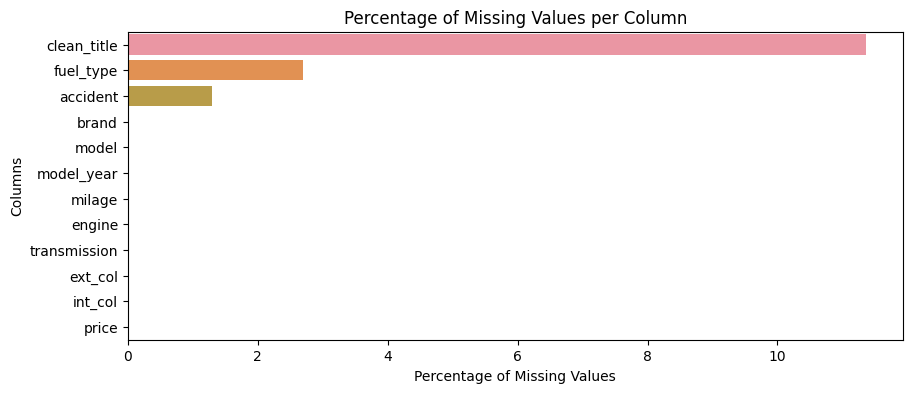

In [ ]:
plt.figure(figsize=(10, 4))  # Optional: Adjusts the size of the plot
sns.barplot(y=percent_of_missing.index, x=percent_of_missing)

plt.title('Percentage of Missing Values per Column')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')

plt.show()


In [ ]:
train_original['price'].skew()

20.252606780474988

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


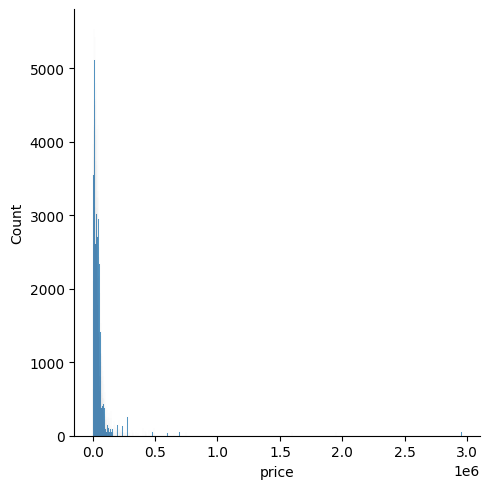

In [ ]:
sns.displot(train_original['price'])

**Price is right-skewed.It means Mean > Median> Mode. For right skewed distribution we can apply log transformation to make distribution more symmetric.**

**(Skewness = 0: The distribution is perfectly symmetric (normally distributed))**

In [ ]:
np.log(train_original['price'].skew())

3.008283515167565

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

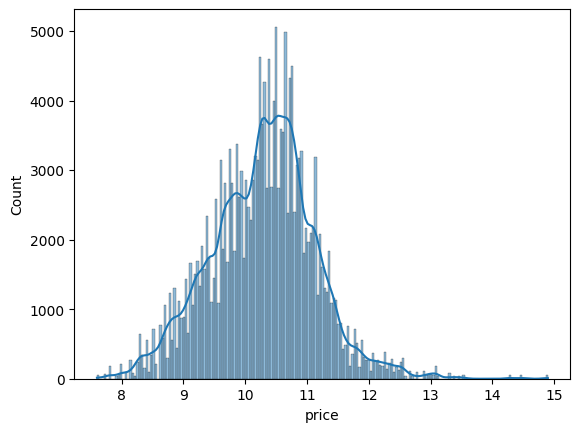

In [ ]:
sns.histplot(x=np.log(train['price']), kde=True)

In [ ]:
print(f"Skewness: {train_original['milage'].skew()}")
#we can apply np.sqrt to make distribution more symetric
print(f"Skewnessa after applying sqrt: {(train_original['milage']**(1/2)).skew()}")

Skewness: 0.9013528832805361
Skewnessa after applying sqrt: 0.014059243446193099


**Combine the training and test dataframe for preprocessing**

In [ ]:
df = pd.concat([train, test], axis=0, ignore_index=True)

In [ ]:
df['brand'].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

Create a binary feature ***premium_auto*** based on the presence of certain values (luxury brands) in another column (brand).

In [ ]:
luxury_auto = [
    "Mercedes-Benz",
    "Audi",
    "BMW",
    "Tesla",
    "Cadillac",
    "Land Rover",
    "Porsche",
    "Lexus",
    "INFINITI",
    "Jaguar",
    "Rolls-Royce",
    "Bentley",
    "Ferrari",
    "Aston Martin",
    "Lamborghini",
    "Bugatti",
    "Maserati",
    "Lucid",
    "Polestar",
    "Maybach",
    "Lincoln"
]

In [ ]:
df['premium_auto'] = df['brand'].apply(lambda x: 1 if x in luxury_auto else 0)
df.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,premium_auto
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0,0
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0,1
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0,0


Extract useful data from engine, using regular expression. We create separete columns ***num_of_cylinders***, ***horsepower***, ***engine_volume***

In [ ]:
horsepower = []
engine_volume = []
num_of_cylinders = []
for col in df['engine']:
    hp = re.search(r'(\d+\.?\d*)HP', col, re.IGNORECASE)
    #print(hp)
    if hp:
        horsepower.append(float(hp.group(1)))
    else:
        horsepower.append(0)

    volume = re.search(r'(\d+\.?\d*)L|(\d+\.?\d*\s*)Liter', col, re.IGNORECASE)
    if volume:
        if volume.group(1):
            engine_volume.append(float(volume.group(1)))
        elif volume.group(2):
            engine_volume.append(float(volume.group(2)))
    else:
        engine_volume.append(0)

#    cylinder = re.search(r'(\d+)\s*Cylinder|V(\d+)|I(\d+)', col, re.IGNORECASE)

#     if cylinder:
#         # If we find a numeric cylinder, use that
#         if cylinder.group(1):
#             num_of_cylinders.append(float(cylinder.group(1)))
#         # If we find a V-style code, use the number after 'V'
#         elif cylinder.group(2):
#             num_of_cylinders.append(float(cylinder.group(2)))
#         elif cylinder.group(3):
#             num_of_cylinders.append(float(cylinder.group(3)))
    cylinder = re.search(r'(\d+)\s+cylinder|v(\d+)|i(\d+)|straight\s+(\d+)|flat\s+(\d+)', col.lower())
    if cylinder:
        # Check which group matched and return the appropriate number of cylinders
        num_of_cylinders.append(int(next(g for g in cylinder.groups() if g is not None)))
    else:
        # If no match is found, default to 0
        num_of_cylinders.append(0)

print(len(horsepower))
print(len(engine_volume))
print(len(num_of_cylinders))
df['horsepower'] = horsepower
df['engine_volume'] = engine_volume
df['num_of_cylinders'] = num_of_cylinders

314223
314223
314223


Check fuel type column

In [ ]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          276473
Hybrid             11508
E85 Flex Fuel       8929
Diesel              6641
–                   1319
Plug-In Hybrid       858
not supported         29
Name: count, dtype: int64

In engine column we can find the neccessery fuel type for ***not supported*** value

In [ ]:
df[df['fuel_type'] == 'not supported'].head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,premium_auto,horsepower,engine_volume,num_of_cylinders
4823,Chevrolet,Suburban LT,2011,109646,not supported,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Beige,None reported,Yes,18998.0,0,320.0,5.3,8
18000,Porsche,Camaro 2SS,2015,67000,not supported,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,11500.0,1,240.0,2.0,4
19182,Nissan,Mirai Limited,2000,131000,not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Black,None reported,Yes,5000.0,0,182.0,0.0,0


In [ ]:
to_replace = []
for row in df.loc[df['fuel_type'] == 'not supported', 'engine']:
    fuel = re.search(r'(Gasoline|Diesel|Hybrid|Flex Fuel|Electric|Plug-In Hybrid)', row)
    if fuel.group(1) == 'Flex Fuel':
        to_replace.append('E85 Flex Fuel')
    else:
        to_replace.append(fuel.group(1))
print(f'Values from engine column to replace not supported:\n {to_replace}')

Values from engine column to replace not supported:
 ['E85 Flex Fuel', 'Gasoline', 'Electric', 'Gasoline', 'Electric', 'Gasoline', 'Electric', 'Gasoline', 'Gasoline', 'Electric', 'Gasoline', 'Electric', 'Gasoline', 'Gasoline', 'Electric', 'Electric', 'Gasoline', 'Gasoline', 'Electric', 'Electric', 'Electric', 'Gasoline', 'E85 Flex Fuel', 'Gasoline', 'Electric', 'Electric', 'Gasoline', 'Gasoline', 'Electric']


In [ ]:
df.loc[df['fuel_type'] == 'not supported', 'fuel_type'] = to_replace

In [ ]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          276487
Hybrid             11508
E85 Flex Fuel       8931
Diesel              6641
–                   1319
Plug-In Hybrid       858
Electric              13
Name: count, dtype: int64

In [ ]:
# there is no values to extract from engine for '-' fuel type
df[df['fuel_type'] == '–'].head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,premium_auto,horsepower,engine_volume,num_of_cylinders
532,Dodge,Challenger R/T Scat Pack,2021,35000,–,–,8-Speed A/T,Blue,Gray,None reported,Yes,48000.0,0,0.0,0.0,0
1155,Ford,Mustang GT Premium,2017,143600,–,–,6-Speed M/T,White,Black,At least 1 accident or damage reported,Yes,31000.0,0,0.0,0.0,0
1307,Toyota,Land Cruiser Base,1994,138033,–,–,A/T,Green,Beige,None reported,Yes,11999.0,0,0.0,0.0,0


Check missing values in ***fuel_type*** column

In [ ]:
df['fuel_type'].isna().sum()

8466

Use engine ***column*** to extract data for *fuel_type* column

In [ ]:
fuel = df[pd.isna(df['fuel_type'])]
type_of_fuel = []
for col in fuel['engine']:
    col = col.lower()
    if 'hybrid' in col:
        type_of_fuel.append('Hybrid')
    elif 'gasoline' in col:
        type_of_fuel.append('Gasoline')
    elif 'flex fuel' in col:
        type_of_fuel.append('E85 Flex Fuel')
    elif 'diesel' in col:
        type_of_fuel.append('Diesel')
    else:
        type_of_fuel.append('Electric')


nan_indices = df[pd.isna(df['fuel_type'])].index
df.loc[nan_indices, 'fuel_type'] = type_of_fuel

In [ ]:
df['transmission'].value_counts()

transmission
A/T                                                   83036
8-Speed A/T                                           34586
Transmission w/Dual Shift Mode                        32079
6-Speed A/T                                           30105
6-Speed M/T                                           19863
7-Speed A/T                                           18498
Automatic                                             17866
8-Speed Automatic                                     13977
10-Speed A/T                                          13347
9-Speed A/T                                            6450
5-Speed A/T                                            5458
10-Speed Automatic                                     5268
6-Speed Automatic                                      4690
4-Speed A/T                                            4212
5-Speed M/T                                            4048
9-Speed Automatic                                      3878
CVT Transmission           

Simplify ***transmission*** type column

In [ ]:
fuel = df[pd.isna(df['fuel_type'])]

# Iterate over 'engine' column, update 'fuel_type' based on keywords
for i, col in enumerate(fuel['engine'].str.lower()):  # Lowercase all 'engine' values
    if 'hybrid' in col:
        df.loc[fuel.index[i], 'fuel_type'] = 'Hybrid'
    elif 'gasoline' in col:
        df.loc[fuel.index[i], 'fuel_type'] = 'Gasoline'
    elif 'flex fuel' in col:
        df.loc[fuel.index[i], 'fuel_type'] = 'E85 Flex Fuel'
    elif 'diesel' in col:
        df.loc[fuel.index[i], 'fuel_type'] = 'Diesel'
    else:
        df.loc[fuel.index[i], 'fuel_type'] = 'Electric'


In [ ]:
(100 * df.isna().sum()/df.shape[0]).sort_values(ascending=False)

price               40.000255
clean_title         11.347992
accident             1.299714
brand                0.000000
model                0.000000
model_year           0.000000
milage               0.000000
fuel_type            0.000000
engine               0.000000
transmission         0.000000
ext_col              0.000000
int_col              0.000000
premium_auto         0.000000
horsepower           0.000000
engine_volume        0.000000
num_of_cylinders     0.000000
dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


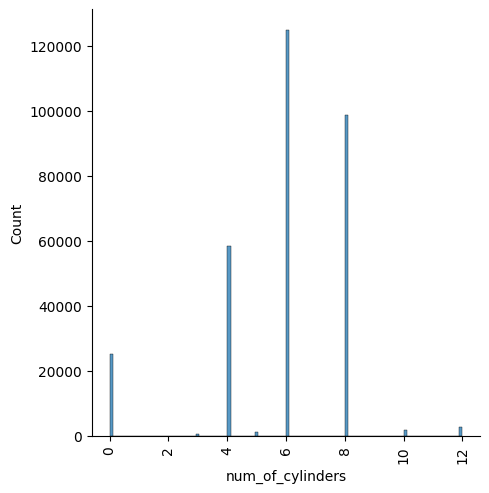

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df['num_of_cylinders'])

plt.xticks(rotation=90)

plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


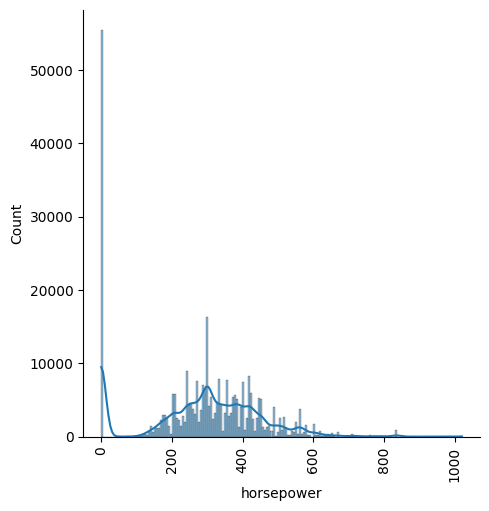

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df['horsepower'], kde=True)

plt.xticks(rotation=90)

plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


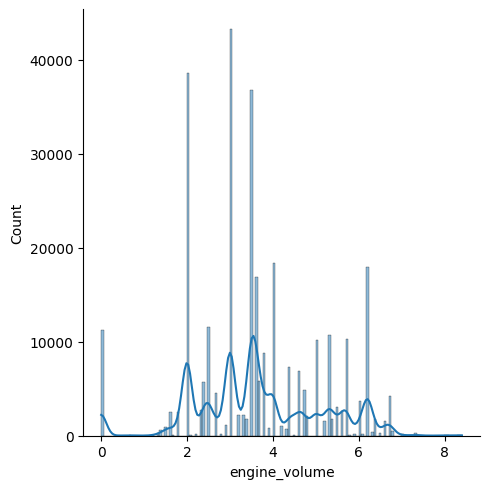

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df['engine_volume'], kde=True)

In [ ]:
df['clean_title'].value_counts()

clean_title
Yes    278565
Name: count, dtype: int64

***clean_title*** contains one value, I drop this column

In [ ]:
df = df.drop(['clean_title'], axis=1)

In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,premium_auto,horsepower,engine_volume,num_of_cylinders
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,4200.0,0,172.0,1.6,4
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,4999.0,1,252.0,3.9,8
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,13900.0,0,320.0,5.3,8
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,45000.0,0,420.0,5.0,8
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,97500.0,1,208.0,2.0,4


Processing ***accident*** column. Fill with mode value

In [ ]:
df['accident'] = df['accident'].fillna(df['accident'].mode()[0])

In [ ]:
df['num_of_cylinders'] = df['num_of_cylinders'].fillna(0)

Treat a low frequency values

In [ ]:
def treat_low_frequency(df):
    threshold = 150
    category_columns = ['brand', 'model', 'fuel_type', 'engine', 'transmission',
                        'ext_col', 'int_col', 'accident']

    to_treat = ['model', 'engine', 'transmission', 'ext_col', 'int_col']

    for col in to_treat:
        # Replace low-frequency values with 'Noise'
        value_counts = df[col].value_counts(dropna=False)
        low_freq_mask = df[col].map(value_counts) < threshold
        df.loc[low_freq_mask, col] = "Noise"

    for col in category_columns:
        # Fill missing values and convert to category using .loc[]
        df.loc[:, col] = df[col].astype(str)  # Ensures the original DataFrame is updated
        df.loc[:, col] = df[col].fillna('Unknown')
        df.loc[:, col] = df[col].astype('category')  # Convert back to category

    return df

# Apply the cleaning function to your datasets
train_ds = treat_low_frequency(df.iloc[:limit, :])
test_ds = treat_low_frequency(df.iloc[limit:, :])


In [ ]:
train_ds.shape

(192542, 15)

In [ ]:
train_ds.isna().sum()

brand                  0
model                  0
model_year             0
milage                 0
fuel_type              0
engine                 0
transmission           0
ext_col                0
int_col                0
accident               0
price               4009
premium_auto           0
horsepower             0
engine_volume          0
num_of_cylinders       0
dtype: int64

In [ ]:
X = train_ds.drop('price', axis=1)
y = train_original['price']

In [ ]:
for col in X.select_dtypes(include=['object']):
    X[col] = X[col].astype('category')

In [ ]:
X.select_dtypes(include=['category']).head(3)

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident
0,MINI,Cooper S Base,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported
1,Lincoln,Noise,Gasoline,Noise,A/T,Silver,Beige,At least 1 accident or damage reported
2,Chevrolet,Noise,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported


In [ ]:
y

0           4200
1           4999
2          13900
3          45000
4          97500
           ...  
192537    349950
192538     53900
192539     90998
192540     62999
192541     40000
Name: price, Length: 192542, dtype: int64

In [ ]:
train_ds.isna().sum()

brand                  0
model                  0
model_year             0
milage                 0
fuel_type              0
engine                 0
transmission           0
ext_col                0
int_col                0
accident               0
price               4009
premium_auto           0
horsepower             0
engine_volume          0
num_of_cylinders       0
dtype: int64

**LightGBM**

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from lightgbm import LGBMRegressor
import numpy as np

# Initialize the LGBMRegressor model
clf_lightgbm = LGBMRegressor(n_estimators=500,
                             learning_rate=0.01,
                             max_depth=3,
                             subsample=0.8652699432423165,
                             min_child_weight=0.0011818629604984495,
                             reg_alpha= 2.9940615297340547,
                             num_leaves=58,

                             colsample_bytree=0.7581942953294089,
                             reg_lambda=0.42348252148933985,
                             verbose=-1)  # verbose=-1 to suppress output during cross-validation

# Define k-fold cross-validation
n_splits = 5  # number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation and evaluate RMSE
rmse_scores = -cross_val_score(clf_lightgbm, X, y, scoring='neg_root_mean_squared_error', cv=kf)

# Calculate mean and standard deviation of RMSE
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean RMSE (LightGBM): {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE (LightGBM): {std_rmse:.4f}")

# Fit the LightGBM model to the training data
clf_lightgbm.fit(X, y)
#72580.3820

Mean RMSE (LightGBM): 73000.6849
Standard Deviation of RMSE (LightGBM): 3128.4464


LGBMRegressor(colsample_bytree=0.7581942953294089, learning_rate=0.01,
              max_depth=3, min_child_weight=0.0011818629604984495,
              n_estimators=500, num_leaves=58, reg_alpha=2.9940615297340547,
              reg_lambda=0.42348252148933985, subsample=0.8652699432423165,
              verbose=-1)

**CatBoostRegressor**

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import KFold
import numpy as np

# Ensure your categorical columns are converted to 'category' dtype
categorical_columns = X.select_dtypes(include=['category', 'object'])  # List all categorical columns
for col in categorical_columns:
    X[col] = X[col].astype('category')

# Extract column names
categorical_column_names = categorical_columns.columns.tolist()



# Initialize the CatBoostRegressor model
clf_catboost = CatBoostRegressor(
    iterations=300,
    learning_rate=0.03,
    depth=6,
    l2_leaf_reg=3,
    border_count=254,
    verbose=0  # verbose=0 to suppress output during cross-validation
)

# Define k-fold cross-validation
n_splits = 5  # number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store RMSE scores
rmse_scores = []

# Perform manual cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Convert the training and validation datasets to a CatBoost Pool
    train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_column_names)
    val_pool = Pool(data=X_val, label=y_val, cat_features=categorical_column_names)

    # Fit the model on the training set
    clf_catboost.fit(train_pool)

    # Predict on the validation set
    y_pred = clf_catboost.predict(val_pool)

    # Calculate RMSE
    rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))
    rmse_scores.append(rmse)

# Calculate mean and standard deviation of RMSE
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE: {std_rmse:.4f}")

# Optionally fit the model on the full dataset
train_pool = Pool(data=X, label=y, cat_features=categorical_column_names)
clf_catboost.fit(train_pool)


Categorical columns: ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident']
Mean RMSE: 72997.7124
Standard Deviation of RMSE: 3178.2527


In [ ]:
cbe_encoder = ce.cat_boost.CatBoostEncoder(a=5) #"smoothing" parameter
X_encoded = cbe_encoder.fit_transform(X, y)

In [ ]:
X_encoded.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,premium_auto,horsepower,engine_volume,num_of_cylinders
0,43892.07427,43892.074270,2007,213000,43892.074270,43892.07427,43892.074270,43892.07427,43892.074270,43892.074270,0,172.0,1.6,4
1,43892.07427,43892.074270,2002,143250,40283.703881,43892.07427,40283.703881,43892.07427,43892.074270,43892.074270,1,252.0,3.9,8
2,43892.07427,40356.340245,2002,136731,43892.074270,43892.07427,37343.311891,43892.07427,40283.703881,40283.703881,0,320.0,5.3,8
3,43892.07427,38151.645225,2017,19500,37343.311891,43892.07427,43892.074270,43892.07427,43892.074270,38085.061891,0,420.0,5.0,8
4,43892.07427,43892.074270,2021,7388,37932.287900,43892.07427,43892.074270,43992.79479,40356.340245,38616.980207,1,208.0,2.0,4


**LinearRegression**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Define the pipeline with preprocessing and model

# Define the pipeline with LinearRegression
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Apply preprocessing
    ('model', LinearRegression())  # Using LinearRegression
])

# Define k-fold cross-validation
n_splits = 5  # number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation and evaluate RMSE
rmse_scores = -cross_val_score(pipeline, X_encoded, y, scoring='neg_root_mean_squared_error', cv=kf)

# Calculate mean and standard deviation of RMSE
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE: {std_rmse:.4f}")


Mean RMSE: 74003.2490
Standard Deviation of RMSE: 3103.4748


In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Define the pipeline with KNeighborsRegressor
pipeline = Pipeline(steps=[
    ('scaler', RobustScaler()),  # Apply preprocessing
    ('model', KNeighborsRegressor(n_neighbors=25, weights='distance'))  # Using KNeighborsRegressor
])

# Define k-fold cross-validation
n_splits = 5  # number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation and evaluate RMSE
rmse_scores = -cross_val_score(pipeline, X_encoded, y, scoring='neg_root_mean_squared_error', cv=kf)

# Calculate mean and standard deviation of RMSE
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE: {std_rmse:.4f}")


Mean RMSE: 74879.7074
Standard Deviation of RMSE: 3176.2131


In [ ]:
test_ds = test_ds.drop('price', axis=1)

In [ ]:
test_ds.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,premium_auto,horsepower,engine_volume,num_of_cylinders
192542,Cadillac,Noise,2021,3959,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,1,420.0,6.2,8
192543,Audi,A3 2.0T Premium,2019,27300,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,7-Speed A/T,White,Black,None reported,1,220.0,2.0,4
192544,Porsche,Cayenne S,2005,92671,Gasoline,Noise,5-Speed M/T,Blue,Beige,At least 1 accident or damage reported,1,305.0,3.6,6


In [ ]:
test_ds.shape[0]

121681

In [ ]:
submission = pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')
submission.shape[0]

125690

In [ ]:
pred = clf_catboost.predict(test_ds)
submission = pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')
to_submit = pd.DataFrame({
    'id': submission.id,
    'price': pred
})

to_submission.to_csv('submission.csv', index=False)

ValueError: array length 121681 does not match index length 125690

In [ ]:
test_id = pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')
predictions = clf_catboost.predict(test_X_encoded)
test_id['price'] = predictions
test_id.to_csv('submission_cbe_.csv', index=False)

In [ ]:
test_id

,id,price
0,188533,17463.823341
1,188534,77728.837914
2,188535,54119.280931
3,188536,26081.315140
4,188537,29285.772148
...,...,...
125685,314218,25518.299224
125686,314219,49264.698477
125687,314220,21626.606331
125688,314221,16260.800361


In [ ]:
y_hat = clf_catboost.predict(X_encoded)[:10]
inv_boxcox(y_hat, price_lambda)

In [ ]:
train_df['price'].head(10)

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define the XGBoost regressor
xgboost_regressor = XGBRegressor(n_estimators=1000,
                           learning_rate=0.01,
                           max_depth=6,
                           reg_alpha=3,
                           n_jobs=-1,  # Use all available cores
                           verbose=0)  # Suppress output during cross-validation

# Define k-fold cross-validation
n_splits = 5  # number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation and evaluate RMSE
rmse_scores = -cross_val_score(xgboost_regressor, X_encoded, y, scoring='neg_root_mean_squared_error', cv=kf)

# Calculate mean and standard deviation of RMSE
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE: {std_rmse:.4f}")

# Fit the model on the entire dataset
clf_xgboost.fit(X_encoded, y)


In [ ]:
y_xgb = clf_xgboost.predict(X_encoded)
inv_boxcox(y_xgb[:10], price_lambda)

In [ ]:
train_df['price'].head(10)

In [ ]:
test_id = pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')
predictions_xgb = clf_xgboost.predict(test_X_encoded)
test_id['price'] = inv_boxcox(predictions_xgb, price_lambda)
test_id.to_csv('submission_FE_xgb.csv', index=False)

In [ ]:
test_id.head()